# Data Mining in Physics - Presentation 2. - DAGUR 5.2: Outliers, influence, and robust regression

In [1]:
library(microbenchmark)
library(graphics)
library(ggplot2)

In [2]:
options(jupyter.plot_scale=1.4)

## 1. Fit a linear modell to the data

In [10]:
library(lattice)
library(DAAG)

In [39]:
# Export the `roller` dataset from DAAG
df = DAAG::softbacks
# Extract X and y data
x = df$volume
y = df$weight

In [40]:
head(df)

,volume,weight
,<dbl>,<dbl>
1,412,250
2,953,700
3,929,650
4,1492,975
5,419,350
6,1010,950


In [22]:
softbacks.lm <- lm(weight ~ volume, data=softbacks)
summary(softbacks.lm)


Call:
lm(formula = weight ~ volume, data = softbacks)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.674 -39.888 -25.005   9.066 215.910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.3725    97.5588   0.424 0.686293    
volume        0.6859     0.1059   6.475 0.000644 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 102.2 on 6 degrees of freedom
Multiple R-squared:  0.8748,	Adjusted R-squared:  0.8539 
F-statistic: 41.92 on 1 and 6 DF,  p-value: 0.0006445


In [23]:
# Extract coefficients of fit
b = softbacks.lm$coefficients[1]
m = softbacks.lm$coefficients[2]

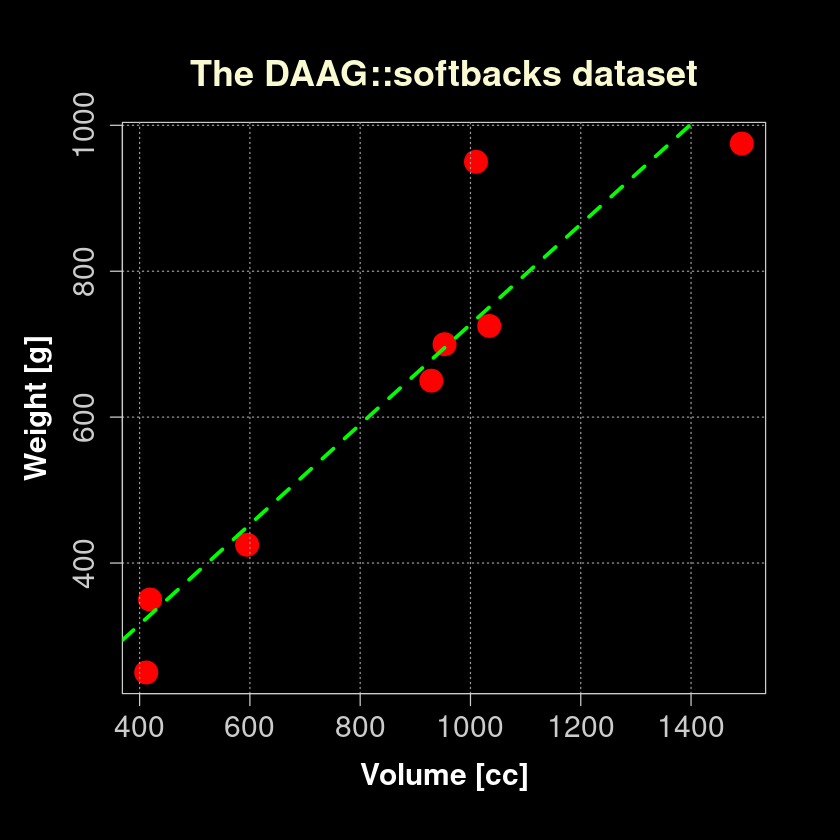

In [37]:
mar = 0.2
par(bg='black', fig=c(0, 1, 0, 1),
    omi=c(mar,mar,mar,mar))

plot(x, y,
     xaxt='n', yaxt='n',
     ann=FALSE, type='n')

box(col=gray(0.8))

points(x, y,
       col='red', lwd=12)
# Fitted line
abline(softbacks.lm,
       col='green', lty=2, lwd=3)

grid(nx=NULL, ny=NULL, lty=3, col=grey(0.6))

axis(1, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)
axis(2, col=gray(0.8), col.ticks=gray(0.8), col.axis=gray(0.8), cex.axis=1.5)

title(main='The DAAG::softbacks dataset',
      col.main='lightgoldenrodyellow', cex.main=1.8, font.main=2) 
title(xlab='Volume [cc]', ylab='Weight [g]',
      col.lab='white', cex.lab=1.5, font.lab=2)

## 2. Diagnostic plots

- Upper left : Residuals with the smoothed lowess curve
- Upper right :  
- Lower left : Checks the trend of the variance
- Lower right : 

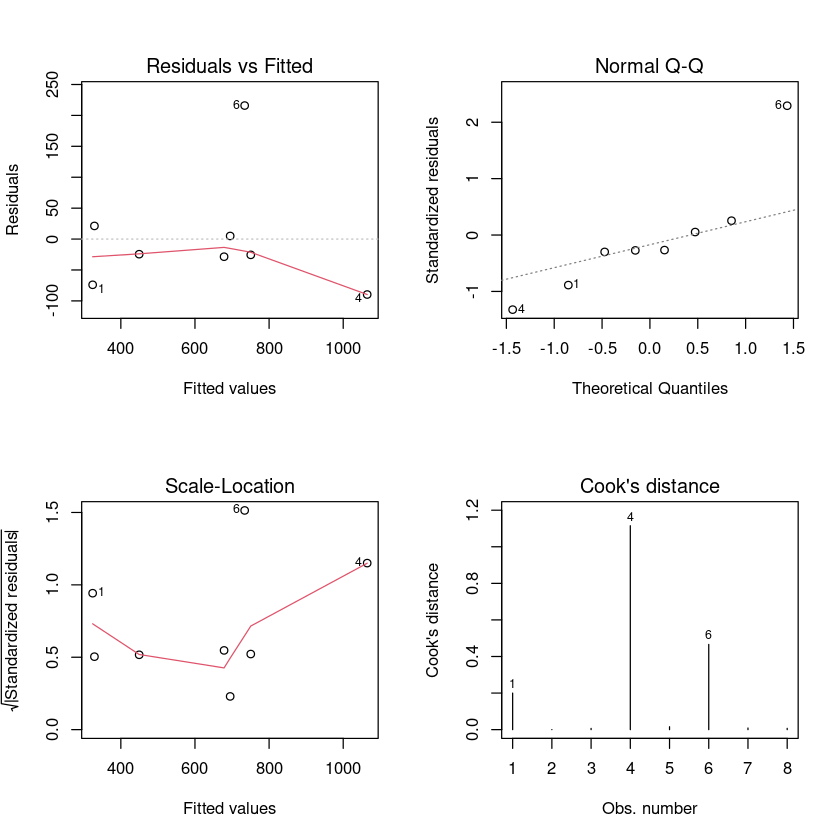

In [35]:
par(mfrow=c(2,2))

plot(softbacks.lm, which=1:4)
# By default, plots 1:3 and 5 [which=c(1:3,5)] are given
par(mfrow=c(1,1))

## 3. ANOVA

In [38]:
anova(softbacks.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
volume,1,437878.22,437878.22,41.92318,0.0006444563
Residuals,6,62668.66,10444.78,NA,NA
